<a href="https://colab.research.google.com/github/Harshu1707/Data-Cleaning-Preprocessing-AIML/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving data.csv to data (1).csv


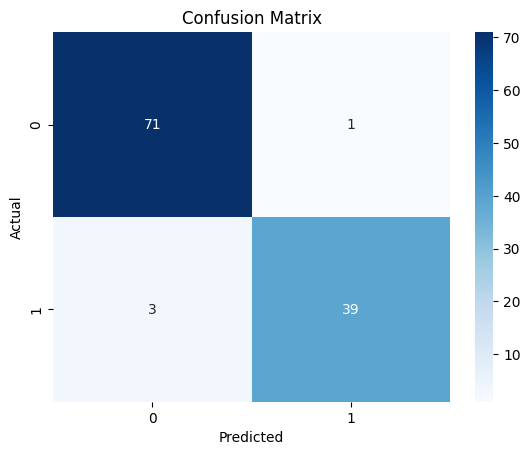

Precision: 0.975
Recall: 0.929
ROC-AUC: 0.996

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



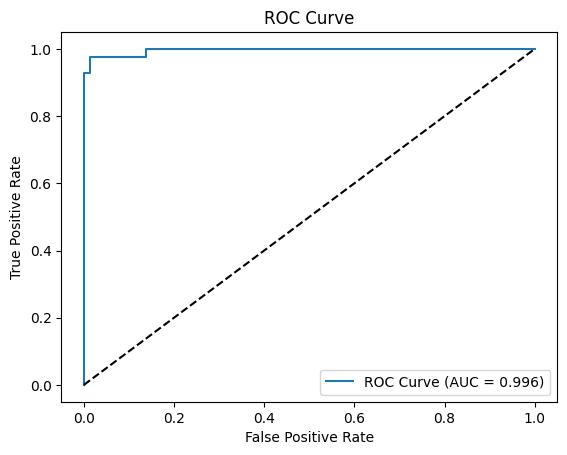

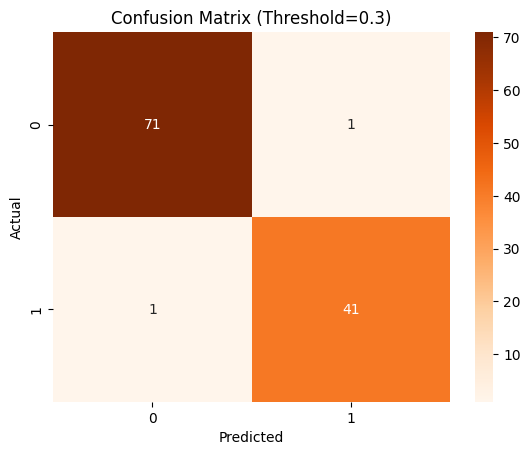

Precision (th=0.3): 0.976
Recall (th=0.3): 0.976


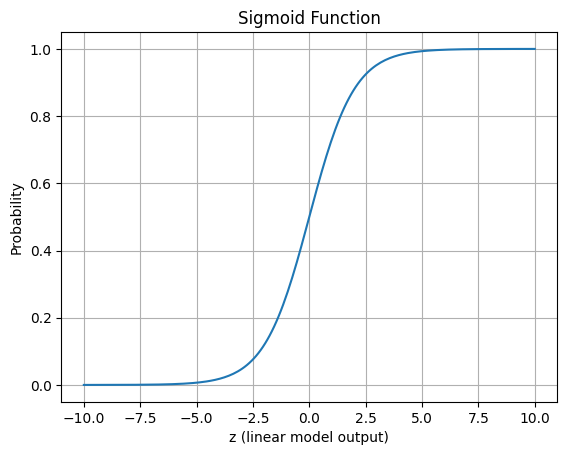

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    precision_score, recall_score, roc_auc_score, roc_curve
)

from google.colab import files
uploaded = files.upload()


df = pd.read_csv(list(uploaded.keys())[0])


df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

threshold = 0.3  # adjust as needed
y_pred_custom = (y_proba >= threshold).astype(int)

cm_custom = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(cm_custom, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Threshold={threshold})")
plt.show()

print(f"Precision (th={threshold}): {precision_score(y_test, y_pred_custom):.3f}")
print(f"Recall (th={threshold}): {recall_score(y_test, y_pred_custom):.3f}")

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 200)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z (linear model output)")
plt.ylabel("Probability")
plt.grid(True)
plt.show()